In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sys
sys.path.insert(1, '../')
import output_utils as ou
import functools as ft

In [2]:
#Layers
layers_burned=ou.parse_layer_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/layers  1  1.dat')
layers_burned=ou.parse_layer_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/layers  1  1.dat')
layers_unburned=ou.parse_layer_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/layers  1  1.dat')

#Water temperature profile
twater_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/water_temp  1  1f2.dat', 't_water')
twater_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/water_temp  1  1f2.dat', 't_water')
twater_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/water_temp  1  1f2.dat', 't_water')

#Salinity profile
sal_water_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/sal_water  1  1f2.dat', 'sal_water')
sal_water_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/sal_water  1  1f2.dat', 'sal_water')
sal_water_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/sal_water  1  1f2.dat', 'sal_water')

#Soil temperature profile
tsoil_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/soil_temp  1  1f2.dat', 't_soil')
tsoil_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/soil_temp  1  1f2.dat', 't_soil')
tsoil_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/soil_temp  1  1f2.dat', 't_soil')

#Methane concentration profile
ch4_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/methane_water  1  1f2.dat', 'ch4')
ch4_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/methane_water  1  1f2.dat', 'ch4')
ch4_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/methane_water  1  1f2.dat', 'ch4')

#Carbon dioxide concentration profile
co2_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/co2_water  1  1f2.dat', 'co2')
co2_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/co2_water  1  1f2.dat', 'co2')
co2_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/co2_water  1  1f2.dat', 'co2')

#Dissolved oxygen profile
do_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/oxygen_water  1  1f2.dat', 'do')
do_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/oxygen_water  1  1f2.dat', 'do')
do_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/oxygen_water  1  1f2.dat', 'do')

#Phosphorus concentration profile
phosph_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/phosph_water  1  1f2.dat', 'phosph')
phosph_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/phosph_water  1  1f2.dat', 'phosph')
phosph_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/phosph_water  1  1f2.dat', 'phosph')

#Chlorophyl-a profile
chla_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/chla  1  1f2.dat', 'chla')
chla_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/chla  1  1f2.dat', 'chla')
chla_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/chla  1  1f2.dat', 'chla')

#Live particulate organic carbon profile
pocl_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/POCL  1  1f2.dat', 'pocl')
pocl_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/POCL  1  1f2.dat', 'pocl')
pocl_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/POCL  1  1f2.dat', 'pocl')

#Dead particulate organic carbon profile
pocd_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/POCD  1  1f2.dat', 'pocd')
pocd_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/POCD  1  1f2.dat', 'pocd')
pocd_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/POCD  1  1f2.dat', 'pocd')

#Dissolved organic carbon profile
doc_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/DOC  1  1f2.dat', 'doc')
doc_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/DOC  1  1f2.dat', 'doc')
doc_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/DOC  1  1f2.dat', 'doc')

#Substrate oxygen demand profile
sod_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/sod  1  1f2.dat', 'sod')
sod_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/sod  1  1f2.dat', 'sod')
sod_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/sod  1  1f2.dat', 'sod')

#Oxygen production profile
prodox_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-burned-spinup/time_series/prodox  1  1f2.dat', 'prodox')
prodox_burned=ou.parse_univariate_file('/home/amullen/LAKE/results/TKL873-spinup/time_series/prodox  1  1f2.dat', 'prodox')
prodox_unburned=ou.parse_univariate_file('/home/amullen/LAKE/results/YKD-unburned-spinup/time_series/prodox  1  1f2.dat', 'prodox')


df_burned = ft.reduce(lambda left, right: pd.merge(left, right, on=['year','month','day','hour','integration_time','depth','Date']), 
                      [twater_burned, sal_water_burned, ch4_burned, co2_burned, do_burned, phosph_burned, chla_burned, pocl_burned,
                       pocd_burned, doc_burned, sod_burned, prodox_burned])

df_unburned = ft.reduce(lambda left, right: pd.merge(left, right, on=['year','month','day','hour','integration_time','depth','Date']), 
                      [twater_unburned, sal_water_unburned, ch4_unburned, co2_unburned, do_unburned, phosph_unburned, chla_unburned, pocl_unburned,
                       pocd_unburned, doc_unburned, sod_unburned, prodox_unburned])

# Burned pond plots

<Axes: xlabel='Date', ylabel='water layer thickness, m'>

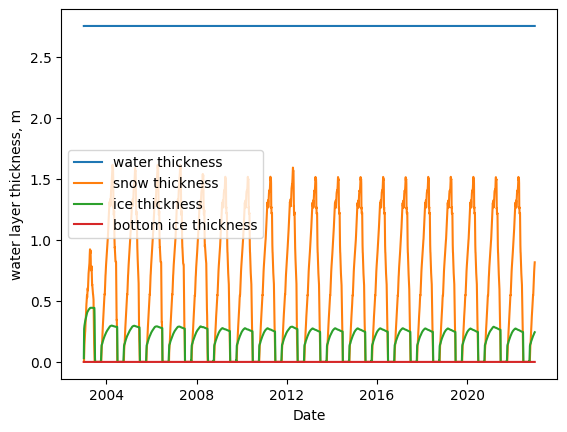

In [3]:
sns.lineplot(data=layers_burned, x='Date', y='water layer thickness, m', label='water thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_mixed_layer_thickness', label='mixed layer thickness')
#sns.lineplot(data=layers_burned, x='datetime', y='mean_lower_layer_thickness', label='lower layer thickness')
sns.lineplot(data=layers_burned, x='Date', y='snow layer thickness,  m', label='snow thickness')
sns.lineplot(data=layers_burned, x='Date', y='ice layer thickness,   m', label='ice thickness')
sns.lineplot(data=layers_burned, x='Date', y='bottom ice thickness,  m', label='bottom ice thickness')

In [27]:
layers_burned[(layers_burned['year']==2022) & (layers_burned['month']==1) & (layers_burned['day']==1)]

,year,month,day,hour,integration_time,"water layer thickness, m","ice layer thickness, m","snow layer thickness, m","bottom ice thickness, m","reservoir volume, m**3","volume deficit (accumulated), m**3",Date,mean_mixed_layer_thickness,mean_lower_layer_thickness,run_name
6939,2022,1,1,12.0,166560.0,2.75,0.2474,0.8591,0.0,13620.0,0.0,2022-01-01,0.0,0.0,time_series


In [5]:
layers_unburned[(layers_unburned['year']==2015) & (layers_unburned['month']==1) & (layers_unburned['day']==1)]

,year,month,day,hour,integration_time,"water layer thickness, m","ice layer thickness, m","snow layer thickness, m","bottom ice thickness, m","reservoir volume, m**3","volume deficit (accumulated), m**3",Date,mean_mixed_layer_thickness,mean_lower_layer_thickness,run_name
14336,2015,1,1,12.0,344088.0,2.75,0.2248,0.4312,0.0,5192.0,0.0,2015-01-01,0.0,0.0,time_series


In [6]:
df_burned.columns

Index(['year', 'month', 'day', 'hour', 'integration_time', 'depth', 't_water',
       'Date', 'sal_water', 'ch4', 'co2', 'do', 'phosph', 'chla', 'pocl',
       'pocd', 'doc', 'sod', 'prodox'],
      dtype='object')

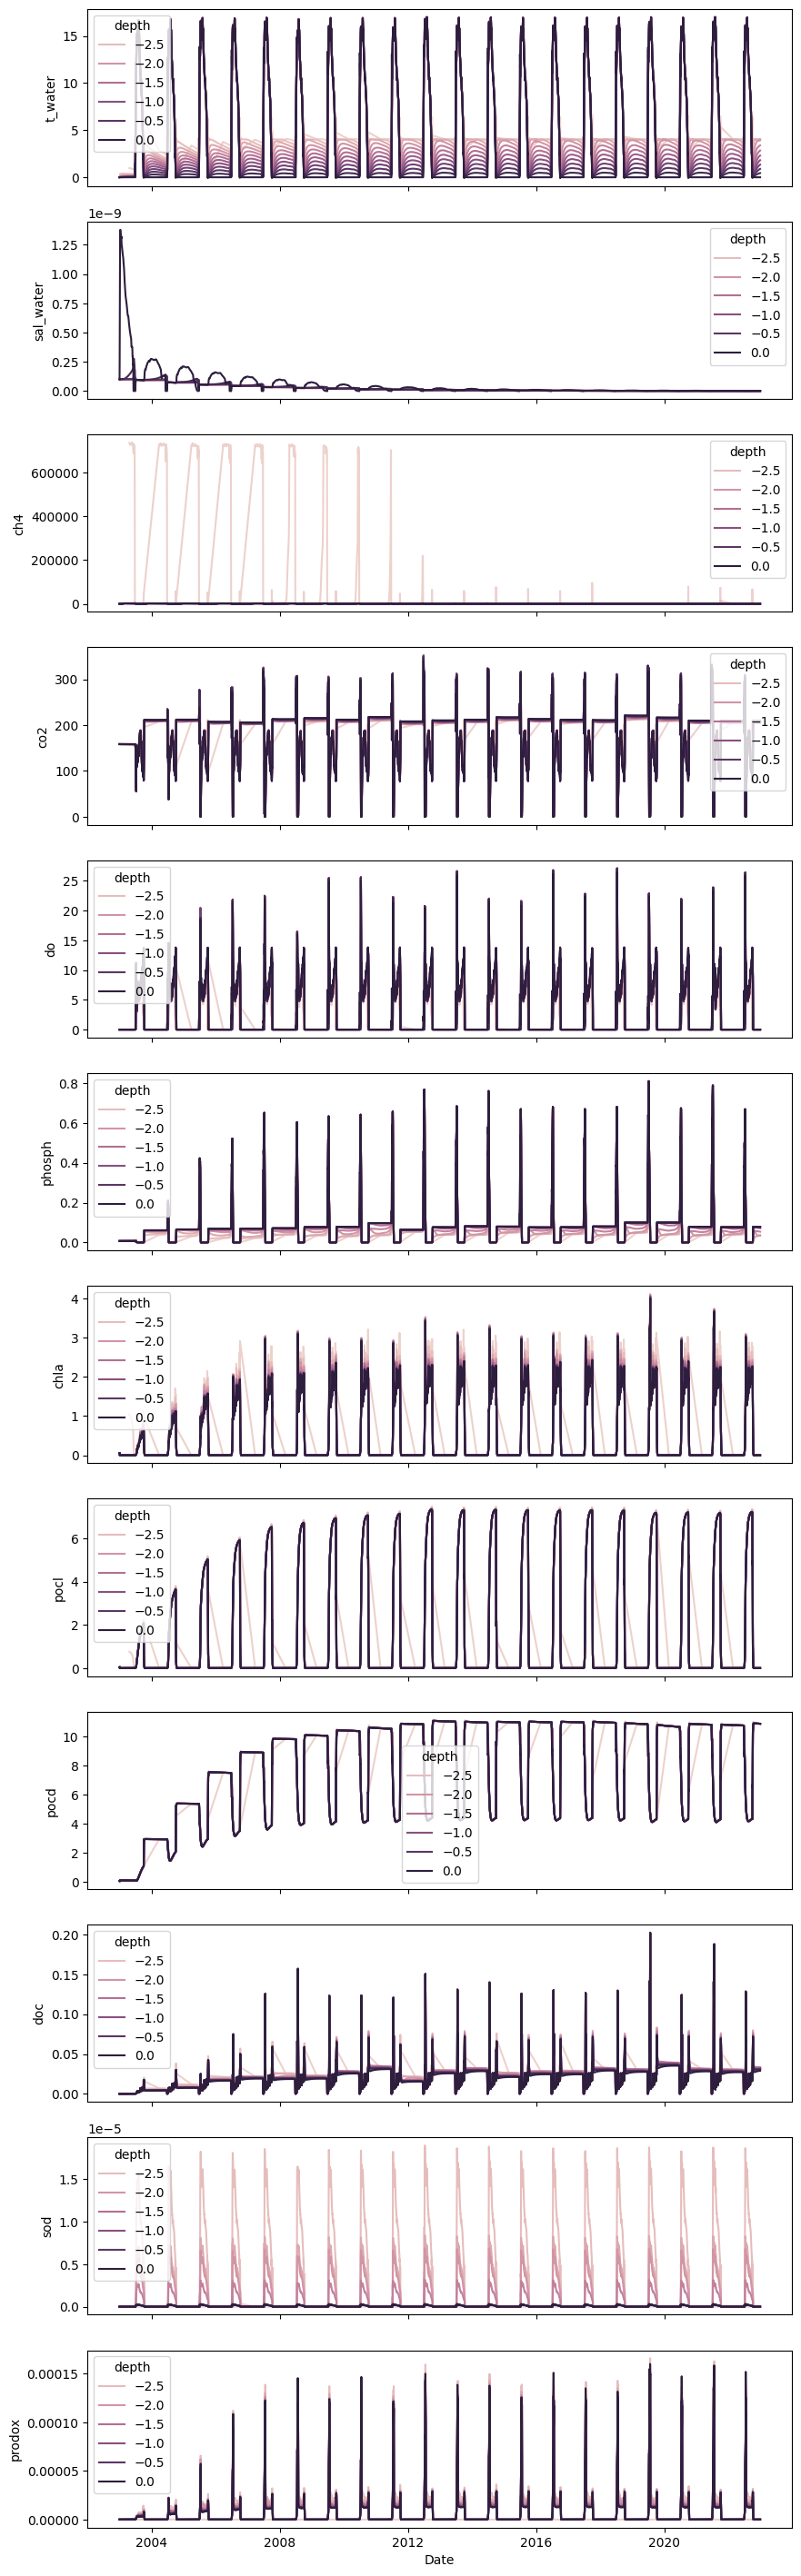

In [7]:
plotting_vars = ['t_water','sal_water', 'ch4', 'co2', 'do', 'phosph', 'chla', 'pocl', 'pocd', 'doc', 'sod', 'prodox']

fig, axes = plt.subplots(len(plotting_vars),1, figsize = (10,3*len(plotting_vars)), sharex=True)

for i, var in enumerate(plotting_vars):
    sns.lineplot(data = df_burned.loc[df_burned[var]!=-999], x='Date', y=var, hue='depth', ax=axes[i])
#plt.savefig('figures/burned_spin_outs.jpg', dpi=300)

(0.0, 10000.0)

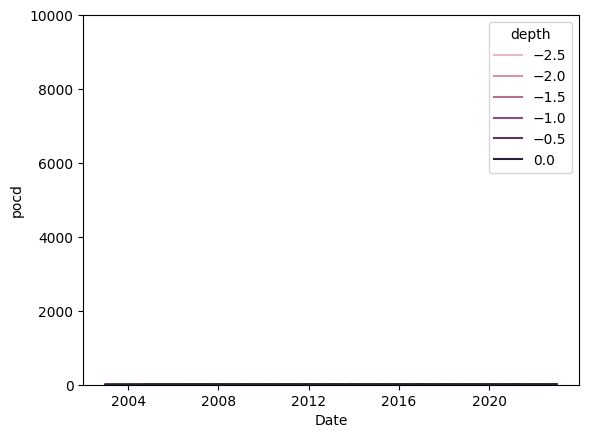

In [8]:
sns.lineplot(data = df_burned.loc[df_burned[var]!=-999], x='Date', y='pocd', hue='depth')
plt.ylim(0,10000)

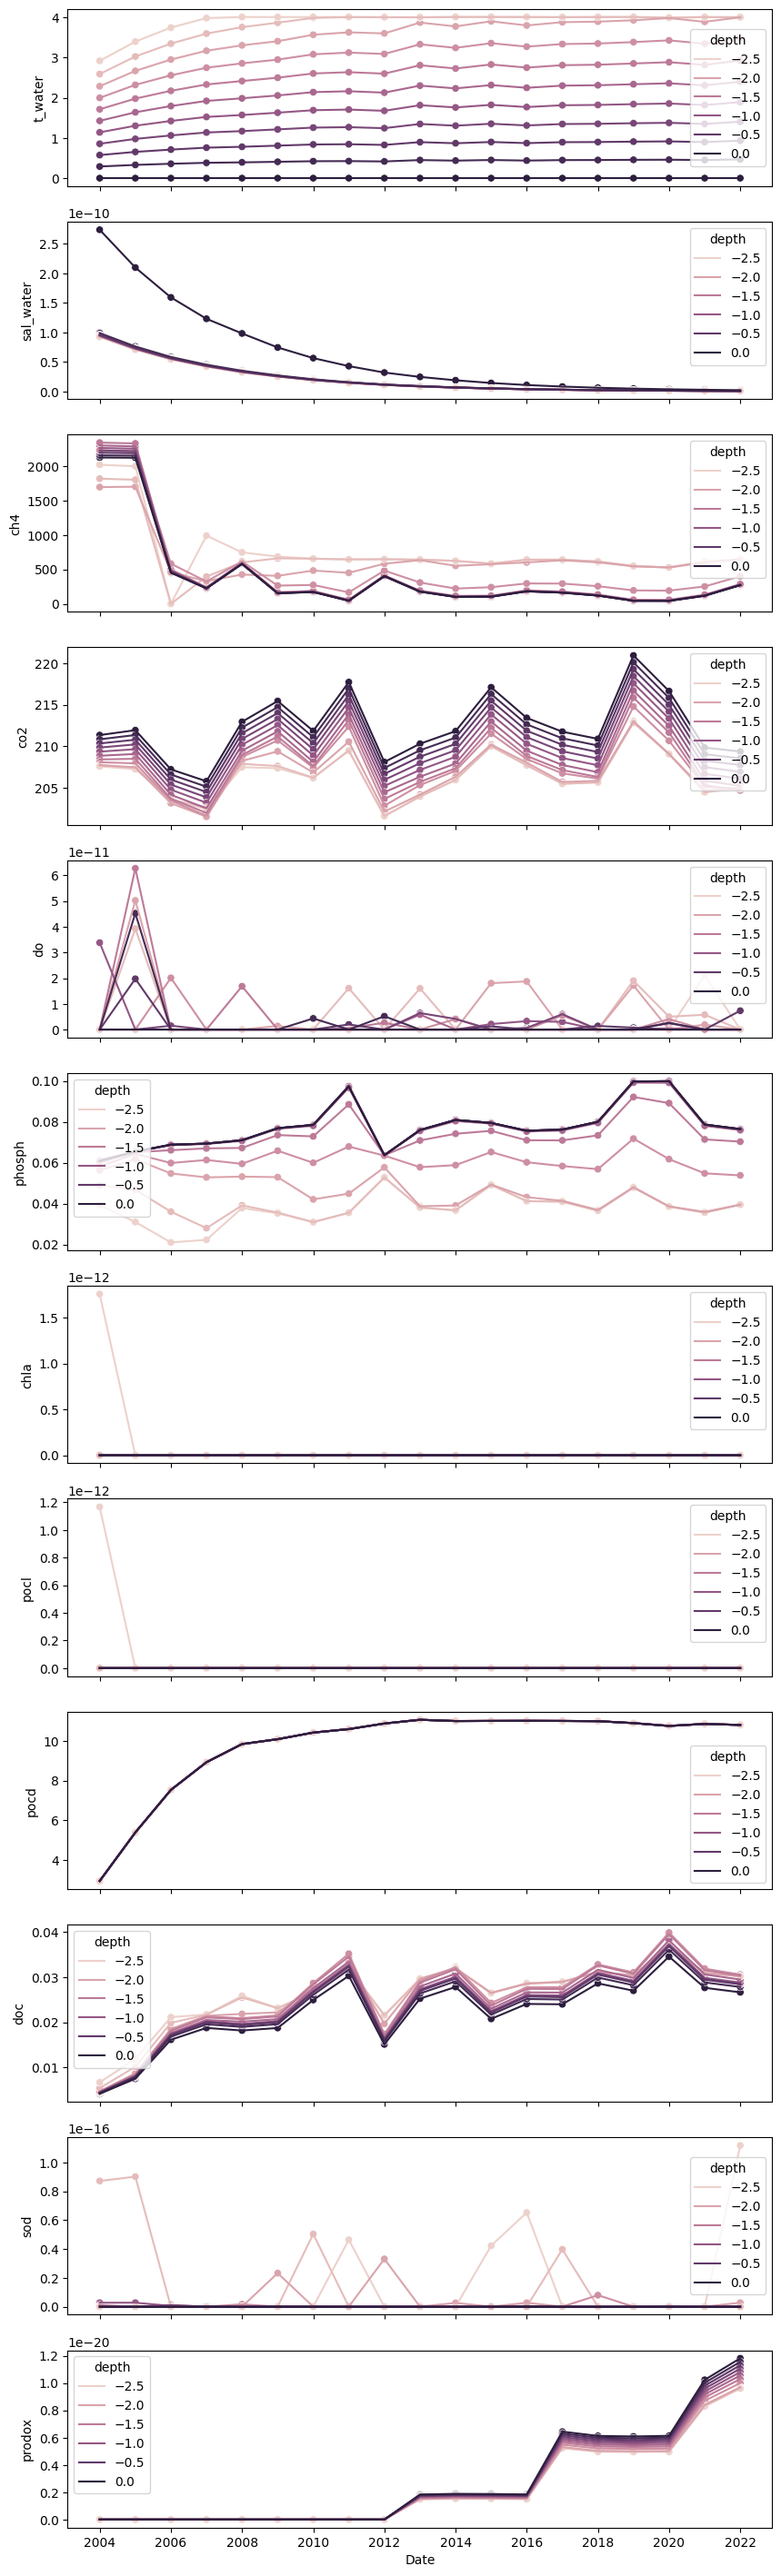

In [9]:
plotting_vars = ['t_water','sal_water', 'ch4', 'co2', 'do', 'phosph', 'chla', 'pocl', 'pocd', 'doc', 'sod', 'prodox']

fig, axes = plt.subplots(len(plotting_vars),1, figsize = (10,3*len(plotting_vars)), sharex=True)
month_init = 1
day_init = 1
for i, var in enumerate(plotting_vars):
    sns.lineplot(data = df_burned.loc[(df_burned[var]!=-999) & (df_burned['month']==month_init) & (df_burned['day']==day_init)], 
                 x='Date', y=var, hue='depth', ax=axes[i])
    sns.scatterplot(data = df_burned.loc[(df_burned[var]!=-999) & (df_burned['month']==month_init) & (df_burned['day']==day_init)], 
                 x='Date', y=var, hue='depth', ax=axes[i], legend=False)

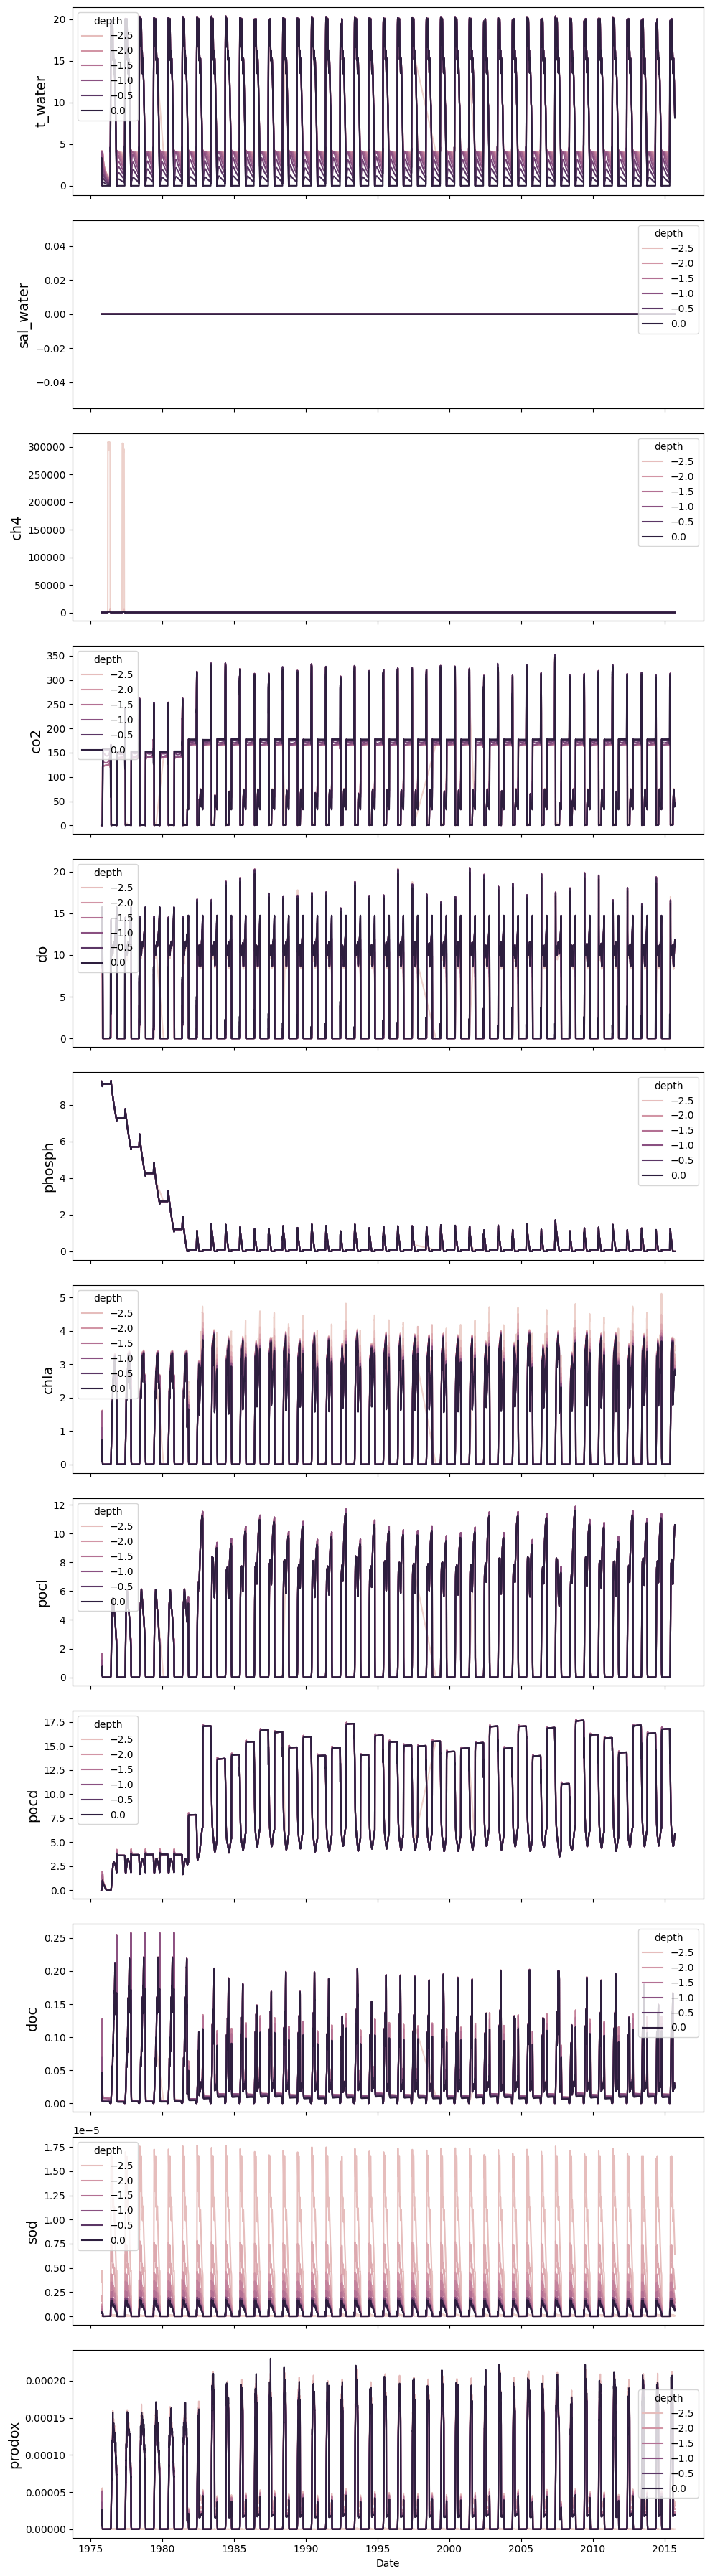

In [10]:
plotting_vars = ['t_water','sal_water', 'ch4', 'co2', 'do', 'phosph', 'chla', 'pocl', 'pocd', 'doc', 'sod', 'prodox']

fig, axes = plt.subplots(len(plotting_vars),1, figsize = (10,3*len(plotting_vars)), sharex=True)

for i, var in enumerate(plotting_vars):
    sns.lineplot(data = df_unburned.loc[df_unburned[var]!=-999], x='Date', y=var, hue='depth', ax=axes[i])
    axes[i].set_ylabel(var, fontsize=14)
fig.tight_layout()

plt.savefig('figures/unburned_spin_outs.jpg', dpi=300)

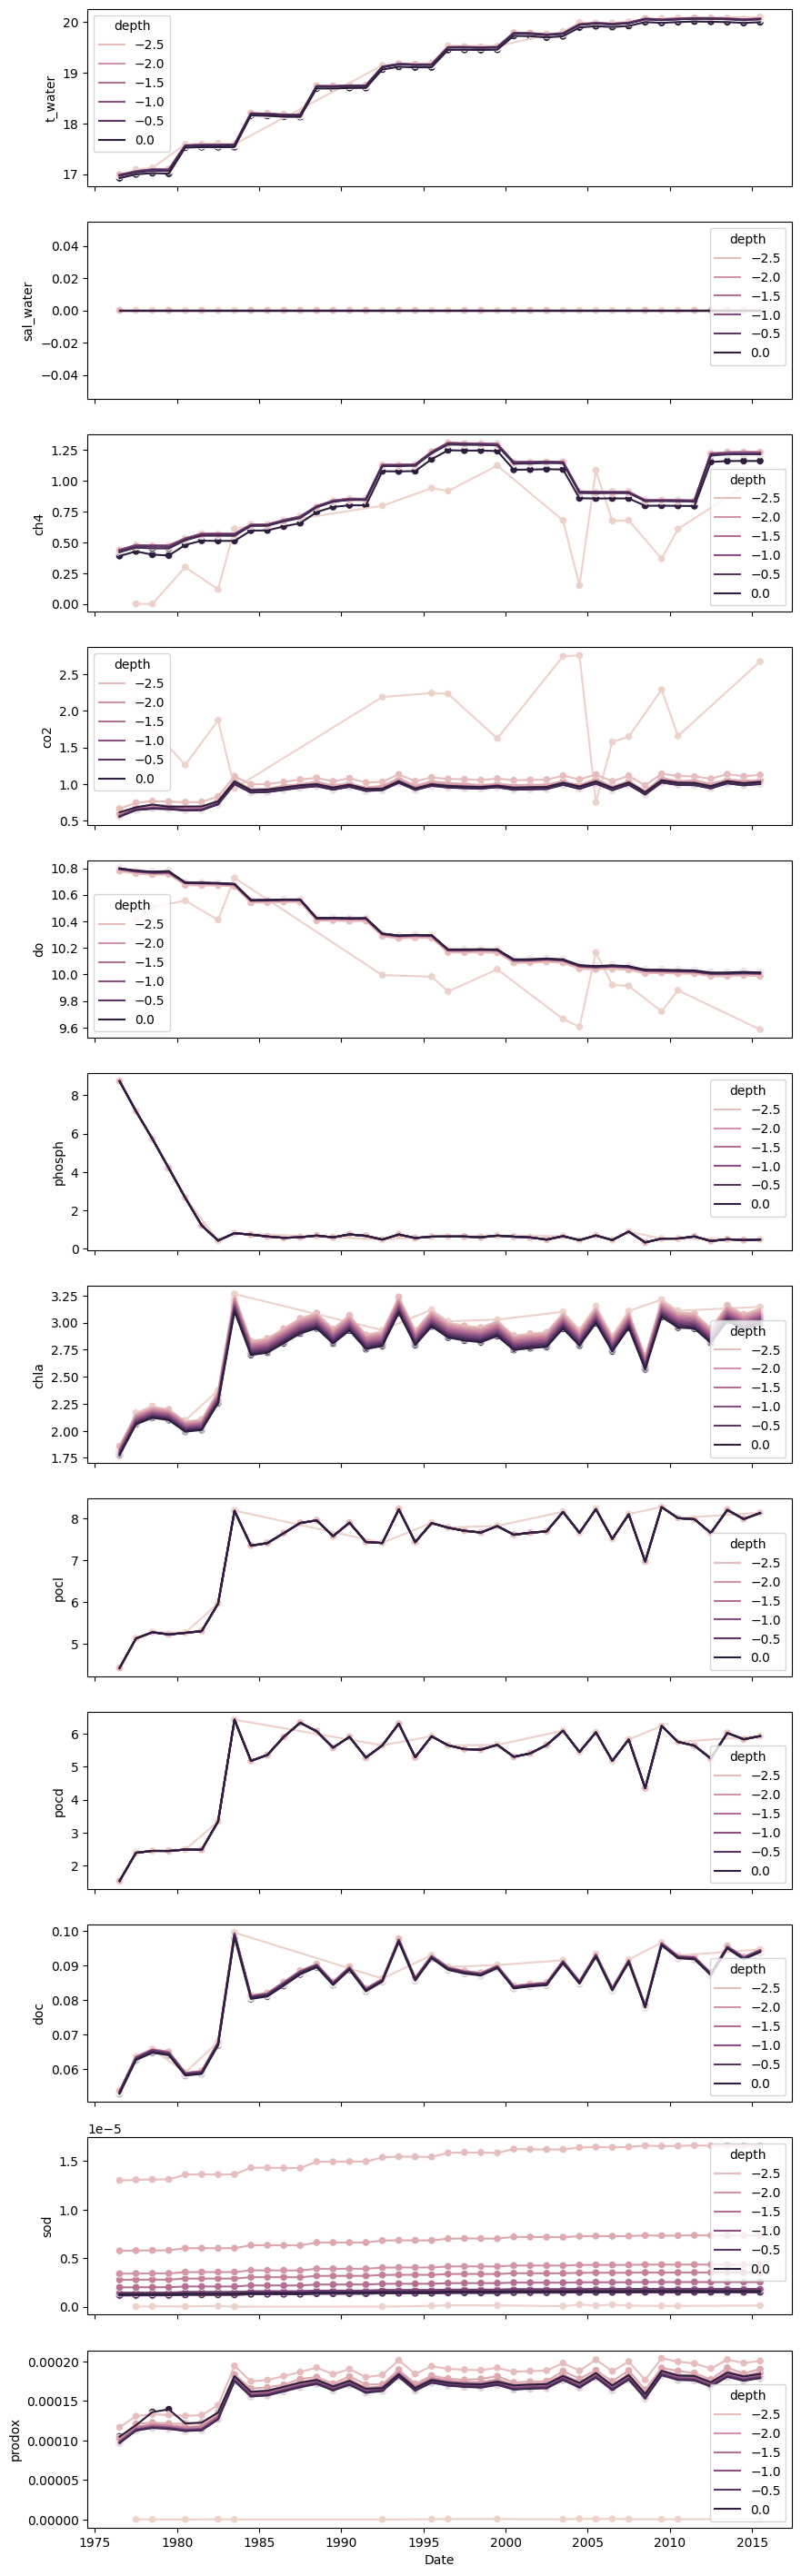

In [11]:
plotting_vars = ['t_water','sal_water', 'ch4', 'co2', 'do', 'phosph', 'chla', 'pocl', 'pocd', 'doc', 'sod', 'prodox']

fig, axes = plt.subplots(len(plotting_vars),1, figsize = (10,3*len(plotting_vars)), sharex=True)
month_init = 7
day_init = 1
for i, var in enumerate(plotting_vars):
    sns.lineplot(data = df_unburned.loc[(df_unburned[var]!=-999) & (df_unburned['month']==month_init) & (df_unburned['day']==day_init)], 
                 x='Date', y=var, hue='depth', ax=axes[i])
    sns.scatterplot(data = df_unburned.loc[(df_unburned[var]!=-999) & (df_unburned['month']==month_init) & (df_unburned['day']==day_init)], 
                 x='Date', y=var, hue='depth', ax=axes[i], legend=False)

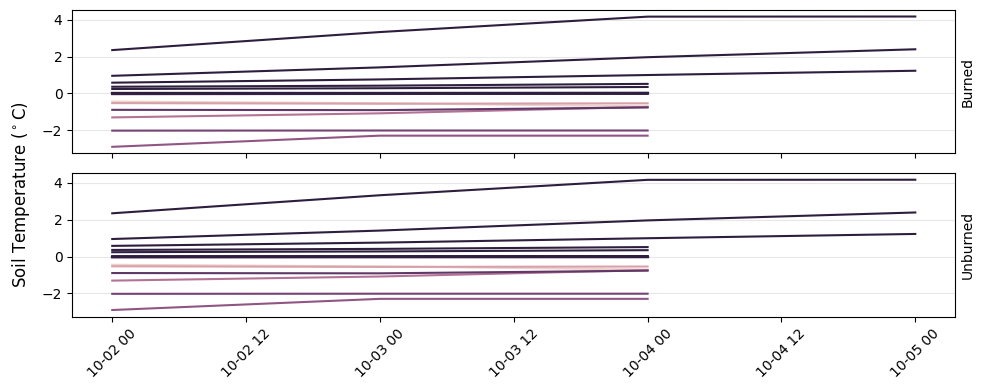

In [12]:
fig, axes = plt.subplots(2,1, figsize=(10,4), sharex=True)

sns.lineplot(data= tsoil_unburned.loc[tsoil_unburned['t_soil']!=-999], 
             x='Date', y='t_soil', label='modeled', ax=axes[0], hue='depth', legend=False)

sns.lineplot(data= tsoil_unburned.loc[tsoil_unburned['t_soil']!=-999], 
             x='Date', y='t_soil', label='modeled', ax=axes[1], hue='depth', legend=False)

axes[0].set_ylabel('Burned')
axes[0].yaxis.set_label_position("right")
axes[0].grid(axis='y', alpha=0.3)

axes[1].set_ylabel('Unburned')
axes[1].yaxis.set_label_position("right")
axes[1].grid(axis='y', alpha=0.3)

axes[1].set_xlabel('')

plt.xticks(rotation=45)
fig.supylabel('Soil Temperature ($^\circ$C)')
fig.tight_layout()


In [19]:
df_unburned.loc[(df_unburned[var]!=-999) & (df_unburned['month']==1) & (df_unburned['day']==1) & (df_unburned['year']==2023)]

,year,month,day,hour,integration_time,depth,t_water,Date,sal_water,ch4,co2,do,phosph,chla,pocl,pocd,doc,sod,prodox


In [14]:
for index, row in df_unburned.loc[(df_unburned[var]!=-999) & (df_unburned['month']==1) & (df_unburned['day']==1) & (df_unburned['year']==2023)].iterrows():
    print(str(row['depth']*-1) + '  ' + str(row['t_water']) + '  ' + str(row['sal_water']) + '  ' + str(row['ch4'] * 0.001) + '  ' + str(row['co2'] * 0.001) + '  ' + str(row['do']/32) + '  ' + str(row['phosph'] / 123.88))

0.0  19.99973826  0.0  0.001160503347  0.001030186342  0.3129625634375  0.003918846868743946
0.25  20.05781388  0.0  0.0012152624960000001  0.0009993603254  0.3128051534375  0.003920027760736197
0.5  20.05975303  0.0  0.0012174596060000001  0.001001895746  0.3127846528125  0.003920085164675492
0.75  20.06092411  0.0  0.001218516103  0.0010065835430000001  0.3127634275  0.003920177639651276
1.0  20.06534376  0.0  0.0012246984649999999  0.001010558544  0.3127103934375  0.003920159230707136
1.25  20.06927164  0.0  0.001230125962  0.0010141612449999999  0.3126525515625  0.003919996470778173
1.5  20.07040465  0.0  0.001231335396  0.001022917514  0.31260446125  0.003919933991766226
1.75  20.06900436  0.0  0.0012295055429999999  0.001029215853  0.3125967915625  0.003920086390054892
2.0  20.06767046  0.0  0.0012277644780000002  0.001035424529  0.3126055540625  0.003920332365999354
2.25  20.07068438  0.0  0.001231446525  0.0010513070630000002  0.312501165625  0.00392015303519535
2.5  20.0758515

In [15]:
for index, row in tsoil_unburned.loc[(tsoil_unburned['t_soil']!=-999) & (tsoil_unburned['month']==1) & (tsoil_unburned['day']==1) & (tsoil_unburned['year']==2023)].iterrows():
    print(str(row['depth']*-1) + '  ' + str(row['t_soil']))

In [25]:
for index, row in df_burned.loc[(df_burned[var]!=-999) & (df_burned['month']==1) & (df_burned['day']==1) & (df_burned['year']==2022)].iterrows():
    print(str(row['depth']*-1) + '  ' + str(row['t_water']) + '  ' + str(row['sal_water']) + '  ' + str(row['ch4'] * 0.001) + '  ' + str(row['co2'] * 0.001) + '  ' + str(row['do']/32) + '  ' + str(row['phosph'] / 123.88))

0.0  -1.422979542e-10  2.133402281e-12  0.2708963958  0.2093846419  1.0000000000000001e-20  0.0006172619307394252
0.25  0.4684505519  7.902091692e-13  0.27227410950000003  0.20856519180000002  0.0  0.0006171271405392316
0.5  0.9335861177  7.551065721e-13  0.2738007604  0.2077618158  2.2932995465625e-13  0.000617100095495641
0.75  1.4048053  7.549266189e-13  0.2756153204  0.2069537482  0.0  0.0006170977093154667
1.0  1.892626107  7.54138215e-13  0.2769662725  0.2061203509  0.0  0.0006169602063287052
1.25  2.401268486  7.475281559e-13  0.2796980011  0.2052681718  0.0  0.0006129657391830805
1.5  2.930227729  7.374806841e-13  0.28612323730000006  0.2047305826  0.0  0.000567546022441072
1.75  3.474961394  7.33985205e-13  0.400403098  0.2049422089  0.0  0.00043430565426218925
2.0  4.004590507  7.320128129e-13  0.6439111165000001  0.2049841146  0.0  0.0003186218053761705
2.25  4.006743039  7.320126609e-13  0.6439393636  0.204980569  0.0  0.0003186130848401679
2.5  4.009353587  7.320125574e-13

In [24]:
for index, row in tsoil_burned.loc[(tsoil_burned['t_soil']!=-999) & (tsoil_burned['month']==1) & (tsoil_burned['day']==1) & (tsoil_burned['year']==2022)].iterrows():
    print(str(row['depth']*-1) + '  ' + str(row['t_soil']))

0.0  4.0333
1.0  5.0451
2.0  5.799
3.0  6.1834
4.0  6.2188
5.0  6.1751
6.0  6.087
7.0  5.9989
8.0  5.9842
9.0  5.9842


In [18]:
#ch4_burned['ch4_mol/m3'] = (ch4_burned['ch4']/1000) * (1/16.05)
ch4_burned['ch4_mol/m3'] = ch4_burned['ch4'] * 0.001

#co2_burned['co2_mol/m3'] = (co2_burned['co2']/1000) * (1/44.01)
co2_burned['co2_mol/m3'] = co2_burned['co2']* 0.001 

#do_burned['do_mol/m3'] = (do_burned['do']/1000) * (1/32)
do_burned['do_mol/m3'] = do_burned['do']/32

po_burned['po_mol_m3'] = po_burned['po'] * 0.001

NameError: name 'po_burned' is not defined